# Build a Logistic Regression Model with Sklearn


## 1. Prep Data with Pandas
It’s standard practice to call our 2d array of features X and our 1d array of target values y.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [2]:
# make all column to numeric
# cause "Sex" column has catetorical/string so create new column 
df['male'] = df['Sex'] == 'male'
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [5]:
# set training set
X = df[["Pclass",'male','Age','Siblings/Spouses','Parents/Children','Fare']].values
X

array([[3, True, 22.0, 1, 0, 7.25],
       [1, False, 38.0, 1, 0, 71.2833],
       [3, False, 26.0, 0, 0, 7.925],
       ...,
       [3, False, 7.0, 1, 2, 23.45],
       [1, True, 26.0, 0, 0, 30.0],
       [3, True, 32.0, 0, 0, 7.75]], dtype=object)

In [6]:
# set target
y = df['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

## 2. Build a Logistic Regression Model with Sklearn

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
X = df[["Fare","Age"]].values
y = df["Survived"].values
X

array([[ 7.25  , 22.    ],
       [71.2833, 38.    ],
       [ 7.925 , 26.    ],
       ...,
       [23.45  ,  7.    ],
       [30.    , 26.    ],
       [ 7.75  , 32.    ]])

In [13]:
# fitting model with datatraining and data target
model.fit(X,y)

LogisticRegression()

In [14]:
model.coef_

array([[ 0.01615949, -0.01549065]])

In [15]:
model.intercept_

array([-0.51037152])

In [25]:
print(f"persamaan: 0 = {model.coef_[0,0]}x + {model.coef_[0,1]}y + {model.intercept_[0]}")

persamaan: 0 = 0.016159489053552974x + -0.015490645786093563y + -0.5103715163362013


In [31]:
def function(x):
    return (model.coef_[0,0]*x + model.intercept_[0])/model.coef_[0,1]

In [40]:
function(10)

22.51530572816914

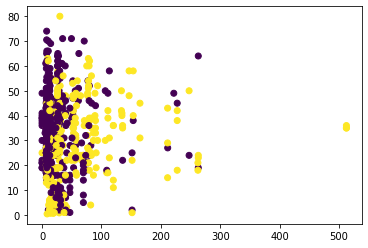

In [44]:
plt.scatter(df['Fare'],df["Age"],c=df["Survived"])
plt.show()

## 3. Make Predictions with the Model
The predict method returns an array of 1’s and 0’s, where 1 means the model predicts the passenger survived and 0 means the model predicts the passenger didn’t survive.

In [45]:
X = df[["Pclass",'male','Age','Siblings/Spouses','Parents/Children','Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [49]:
model.predict([[3, True, 22.0, 1, 0, 7.25]])

array([0])

In [50]:
model.predict(X[:5])

array([0, 1, 1, 1, 0])

In [51]:
y[:5]

array([0, 1, 1, 1, 0])

# 4. Score the Model (Accuracy)

In [53]:
y_pred = model.predict(X)

In [54]:
(y==y_pred).sum()

714

In [56]:
(y==y_pred).sum()/len(y) * 100

80.49605411499437

In [57]:
(y==y_pred).sum()/y.shape[0]

0.8049605411499436

In [58]:
model.score(X,y)

0.8049605411499436